**Observaions: **
    1. All the 5 News channels are emotinally neutral. Only BBS is slightly higher. 
    2. Compared to other News channels, NY Times tweets less frequently. 
    3. All the 5 News Channels tend to tweet positive and negative tweets alternatively. There were no group of positive or negative tweets at the short period of time.  
    

In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [12]:
# collect 100 tweets from each channel 

target_media = ("@BBC", "@CNN", "@CBSNews",
                "@FoxNews", "@nytimes")

results_list = []

username = []
date = []
com_list = []
pos_list = []
neu_list = []
neg_list = []
count = []

# user_tweets = {
#     "Username": username,
#     "Date": date, 
#     "Compound Score": com_list,
#     "Postive Score": pos_list,
#     "Neutral Score": neu_list,
#     "Negative Score": neg_list,
#     "Tweets Ago": count
# }


for media in target_media:
    
    public_tweets = api.user_timeline(media, count=100)
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter_list = []
    date_list = []
    
    counter = 1

    
    for tweet in public_tweets:
        
        results = analyzer.polarity_scores(tweet["text"])
        
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        counter_list.append(counter)
        date_list.append(tweet['created_at'])
      
        counter += 1
        
    username.extend([media]*100),
    date.extend(date_list), 
    com_list.extend(compound_list),
    pos_list.extend(positive_list),
    neu_list.extend(neutral_list),
    neg_list.extend(negative_list),
    count.extend(counter_list)    
    
  
 
    
    user_results = {
        "Username": media,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list),
    }
    
    

    results_list.append(user_results)




In [13]:
user_tweets = {
    "Username": username,
    "Date": date, 
    "Compound Score": com_list,
    "Postive Score": pos_list,
    "Neutral Score": neu_list,
    "Negative Score": neg_list,
    "Tweets Ago": count
}



In [14]:
results_df = pd.DataFrame(results_list).set_index("Username").round(3)
results_df.head()

user_tweets = pd.DataFrame(user_tweets).set_index("Username")



In [15]:
user_tweets.head()

,Compound Score,Date,Negative Score,Neutral Score,Postive Score,Tweets Ago
Username,,,,,,
@BBC,0.1779,Wed Jun 06 18:03:04 +0000 2018,0.122,0.718,0.160,1
@BBC,0.0000,Wed Jun 06 17:02:09 +0000 2018,0.000,1.000,0.000,2
@BBC,0.0000,Wed Jun 06 16:00:01 +0000 2018,0.000,1.000,0.000,3
@BBC,0.3182,Wed Jun 06 13:02:05 +0000 2018,0.000,0.892,0.108,4
@BBC,-0.5574,Wed Jun 06 12:21:20 +0000 2018,0.153,0.847,0.000,5


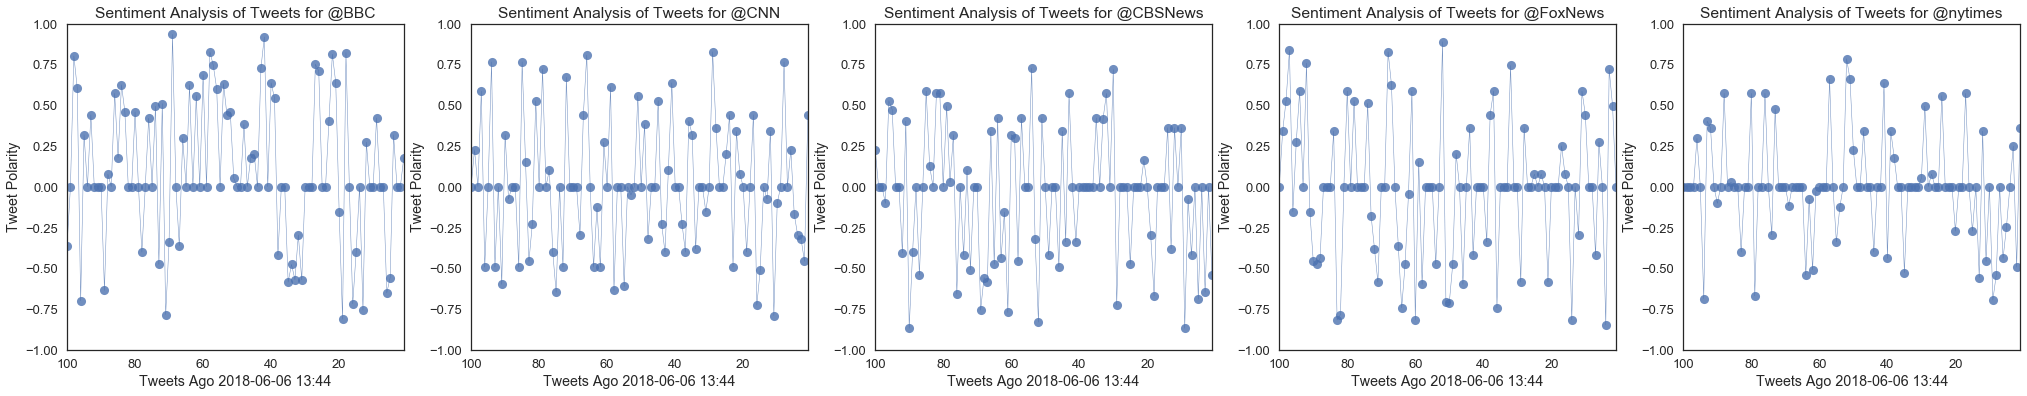

In [17]:
# plot of sentiments
fig, ax = plt.subplots(1, 5, figsize=(35,6), sharex='col', sharey='row') 
count = 1

for media in target_media:
    tweet_df = user_tweets.loc[media,:]
    # Create plot
    x_vals = tweet_df["Tweets Ago"]
    y_vals = tweet_df["Compound Score"]
    
    plt.subplot(1, 5, count)
    plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets for {media}")
    plt.xlim([x_vals.max(),x_vals.min()])
    plt.ylim(-1,1)
    plt.ylabel("Tweet Polarity")
    plt.xlabel(f"Tweets Ago {now}")
    count += 1
 

plt.savefig("100 Tweets polarity.PNG")


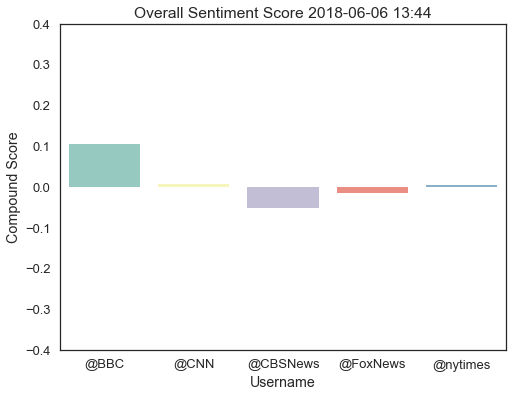

In [18]:
# bar chart of overall scores 


sns.set(style="white", context="talk")
f, ax2 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(x=results_df.index, y=results_df['Compound Score'], palette="Set3", ax=ax2)
ax2.set_ylabel("Compound Score")
ax2.set_ylim(-0.4,0.4)
ax2.set_title(f"Overall Sentiment Score {now}")
plt.savefig("Overall Sentiments.PNG")

In [19]:
pd.DataFrame.to_csv(user_tweets, "100tweets.csv", sep=',')

In [20]:
!ipython nbconvert --to markdown main.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook main.ipynb to markdown
[NbConvertApp] Support files will be in main_files\
[NbConvertApp] Making directory main_files
[NbConvertApp] Making directory main_files
[NbConvertApp] Writing 6243 bytes to main.md
